EDA:
Se realiza un Análisis Exploratorio de Datos, haciendo una búsqueda de valores faltantes, valores atípicos/extremos u outliers. Ya hemos dado tratamiento a los valores 'Sin datos' y ya hemos verificado la inexistencia de duplicados en el apartado de ETL:

In [7]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import Funciones

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_homicidios = pd.read_csv('Data/homicidios.csv')

Se da un tratamiento más exhaustivo al dataframe:

In [3]:
df_homicidios

,ID,ROL,SEXO,EDAD,N VICTIMAS,FECHA,AÑO,MES,DIA,HORA,...,CALLE,CRUCE,DIRECCIÓN NORMALIZADA,COMUNA,XY (CABA),POS X,POS Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,FUE EN CRUCE DE CALLES,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",FUE EN CRUCE DE CALLES,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO FUE EN CRUCE DE CALLES,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,FUE EN CRUCE DE CALLES,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,FUE EN CRUCE DE CALLES,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,FUE EN CRUCE DE CALLES,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.405969,-34.610120,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,FUE EN CRUCE DE CALLES,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",FUE EN CRUCE DE CALLES,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,FUE EN CRUCE DE CALLES,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS


Se analiza la distribución de roles (víctima, acusado) en los accidentes y se desglosa la información por género y edad para comprender mejor quiénes están involucrados en los accidentes:

In [5]:
roles_sexo_edad = df_homicidios[['ROL', 'SEXO', 'EDAD']]

In [6]:
rol_distribution = roles_sexo_edad['ROL'].value_counts()

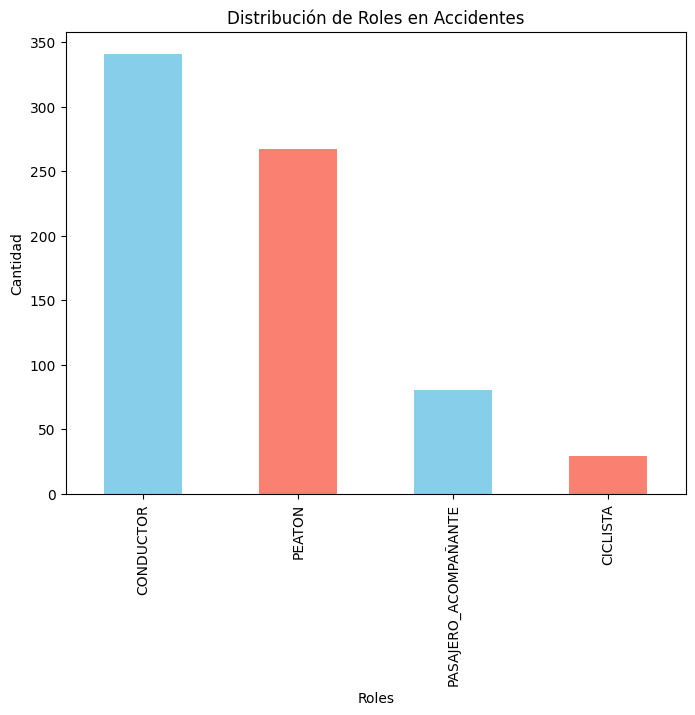

In [8]:
plt.figure(figsize=(8, 6))
rol_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Roles en Accidentes')
plt.xlabel('Roles')
plt.ylabel('Cantidad')
plt.show()

Se desglosa por género y edad:

In [9]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

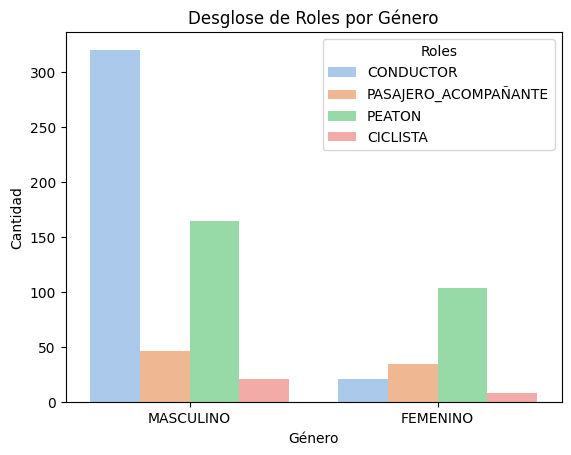

In [10]:
sns.countplot(x='SEXO', hue='ROL', data=roles_sexo_edad, palette='pastel')
plt.title('Desglose de Roles por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Roles')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


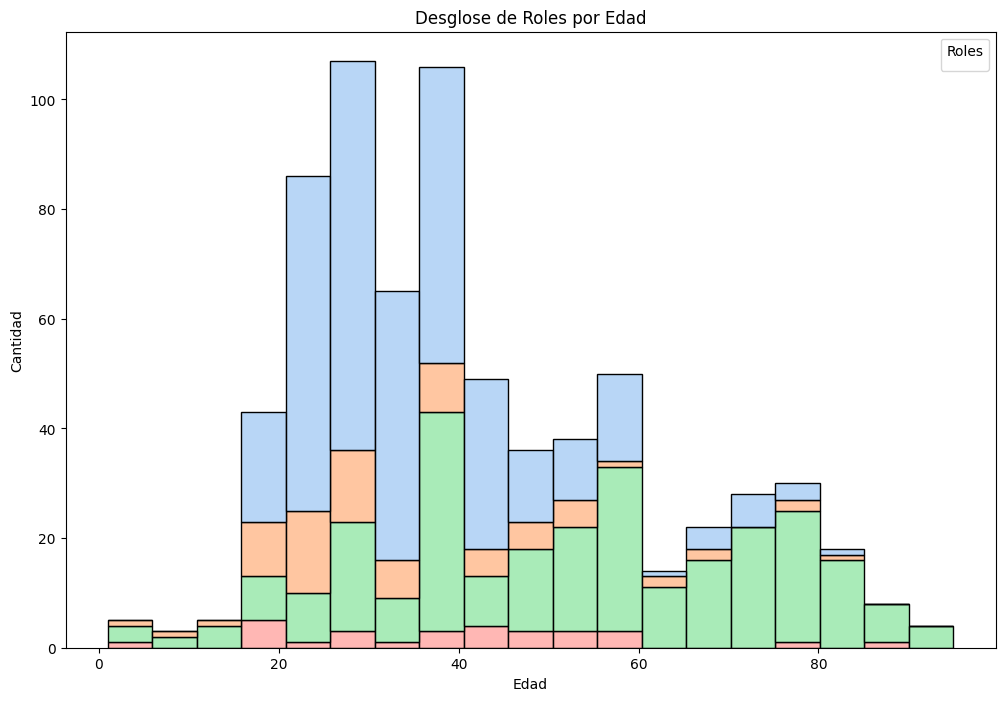

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(data=roles_sexo_edad, x='EDAD', hue='ROL', multiple='stack', palette='pastel', binwidth=5)
plt.title('Desglose de Roles por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(title='Roles')

plt.show()

Se analiza la cantidad de víctimas en cada accidente y se identifica casos de accidentes con múltiples víctimas:

In [12]:
victimas_df = df_homicidios[['ID', 'N VICTIMAS']]

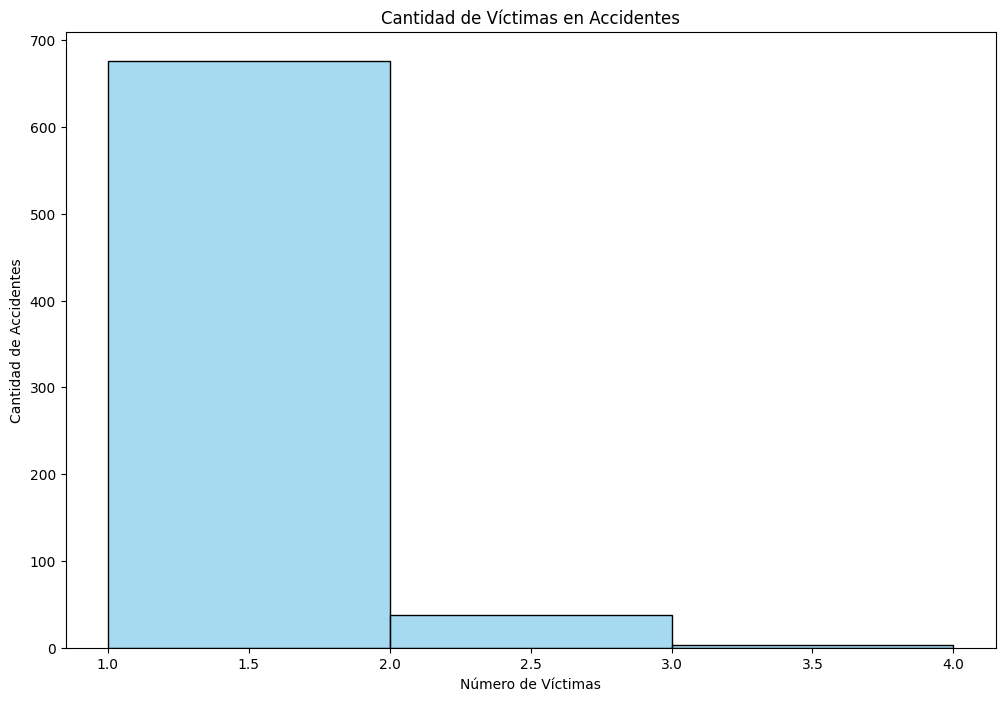

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(data=victimas_df, x='N VICTIMAS', bins=range(1, victimas_df['N VICTIMAS'].max() + 2), kde=False, color='skyblue')
plt.title('Cantidad de Víctimas en Accidentes')
plt.xlabel('Número de Víctimas')
plt.ylabel('Cantidad de Accidentes')
plt.show()

Se identifican los casos de accidentes con múltiples víctimas:

In [14]:
casos_multiples_victimas = victimas_df[victimas_df['N VICTIMAS'] > 1]

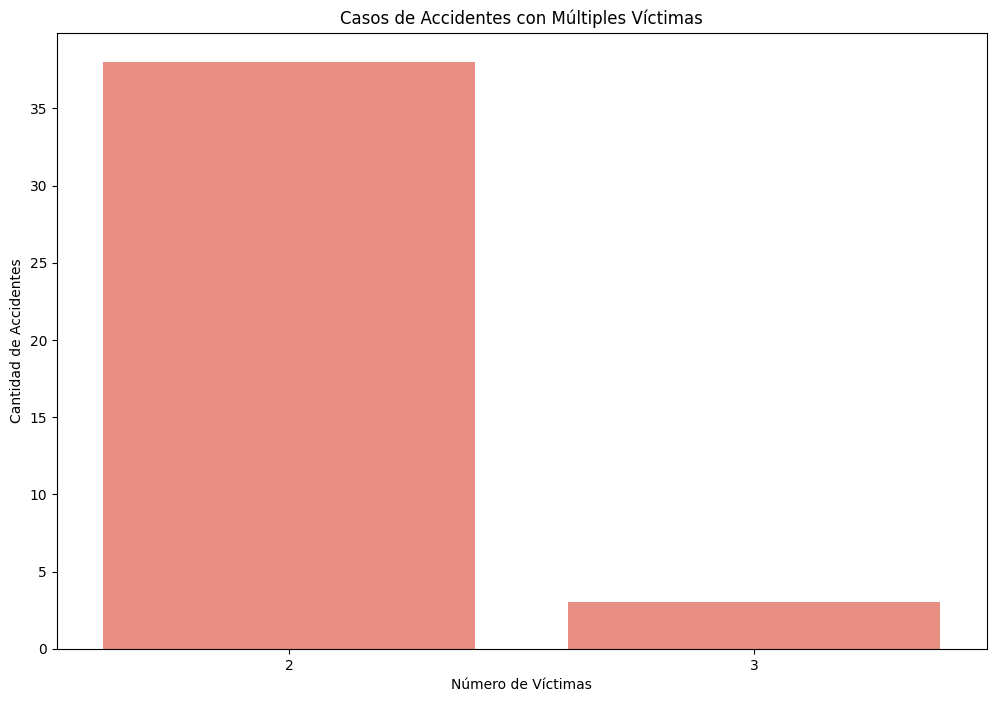

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(x='N VICTIMAS', data=casos_multiples_victimas, color='salmon')
plt.title('Casos de Accidentes con Múltiples Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Cantidad de Accidentes')
plt.show()

Se analizan patrones temporales y estacionales de accidentes, y se verifica si hay horas del día o días de la semana con mayor incidencia:

In [37]:
años = df_homicidios['AÑO'].unique()

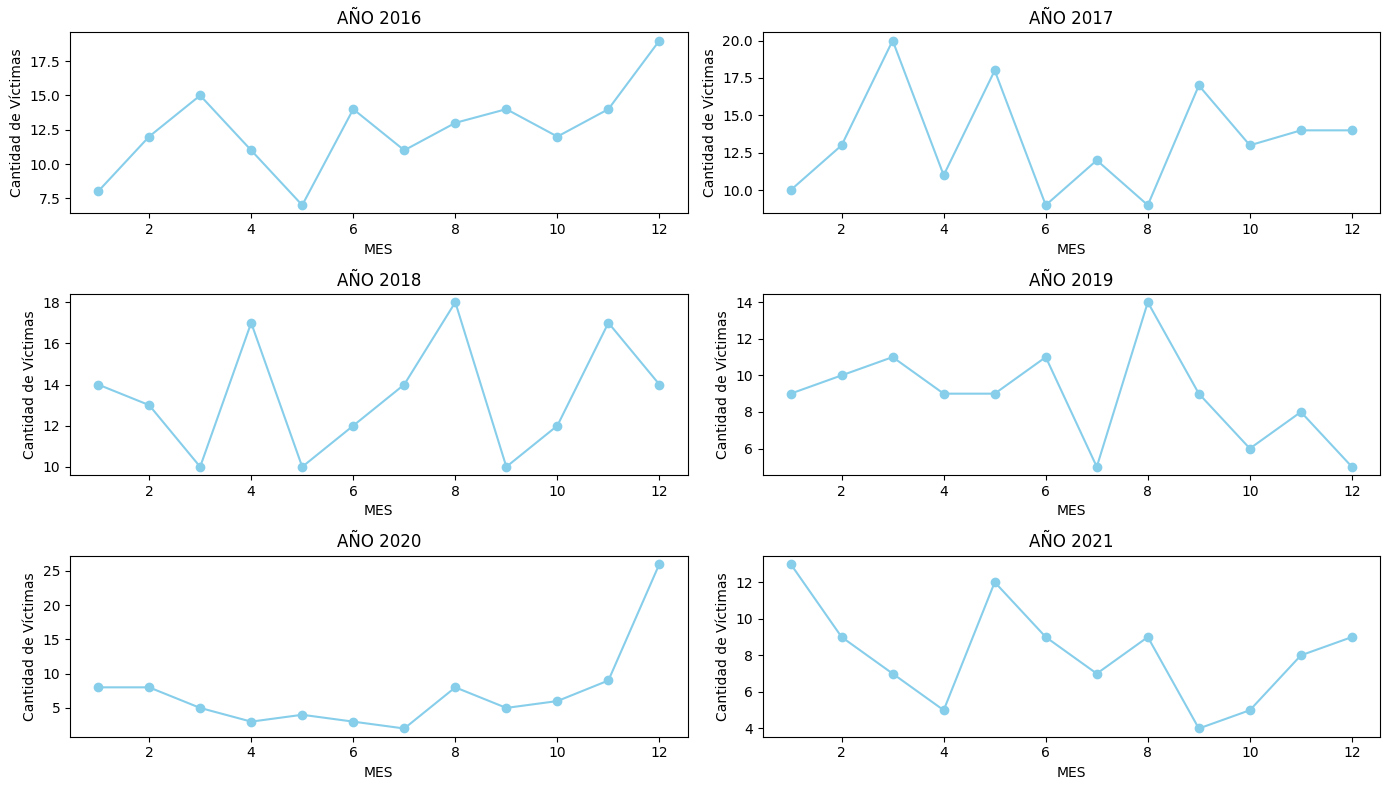

In [42]:
n_filas = 3
n_columnas = 2
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(14, 8))


for i, year in enumerate(años):
    fila = i // n_columnas
    columna = i % n_columnas
    
   
    data_mensual = (df_homicidios[df_homicidios['AÑO'] == year]
                    .groupby('MES')
                    .agg({'N VICTIMAS':'sum'}))
    
    
    ax = axes[fila, columna]
    data_mensual.plot(ax=ax, kind='line', marker='o', linestyle='-', color='skyblue')
    ax.set_title('AÑO ' + str(year)) ; ax.set_xlabel('MES') ; ax.set_ylabel('Cantidad de Víctimas')
    ax.legend_ = None


plt.tight_layout()
plt.show()

Los años que alcanzaron un pico con mayor cantidad de víctimas en un mes, fueron 2020, y 2017. Asimismo, se observa una notable baja de accidentes en el año 2020.

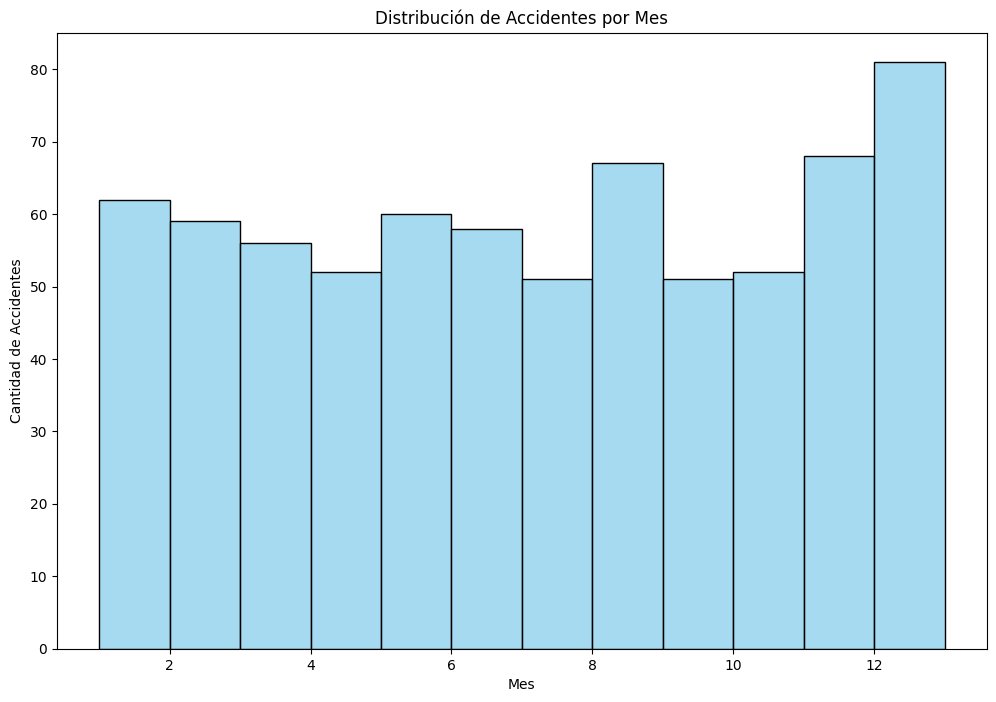

In [24]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df_homicidios, x='MES', bins=range(1, 14), kde=False, color='skyblue')
plt.title('Distribución de Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.show()

Se puede observar que los meses con mayor cantidad de víctimas resultan ser Diciembre, Agosto y Noviembre. Los que tienen menor cantidad de víctimas, Julio, Octubre y Abril.

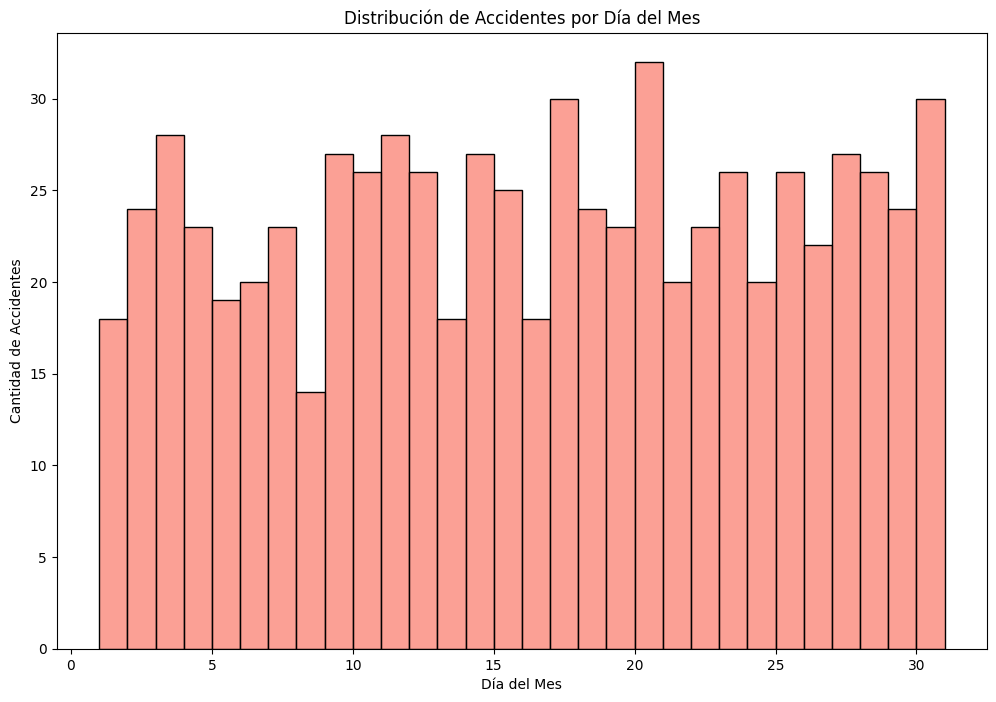

In [29]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df_homicidios, x='DIA', bins=range(1, 32), kde=False, color='salmon')
plt.title('Distribución de Accidentes por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Accidentes')
plt.show()

Se puede observar que el día 20 del mes es el día con mayor cantidad de accidentes.

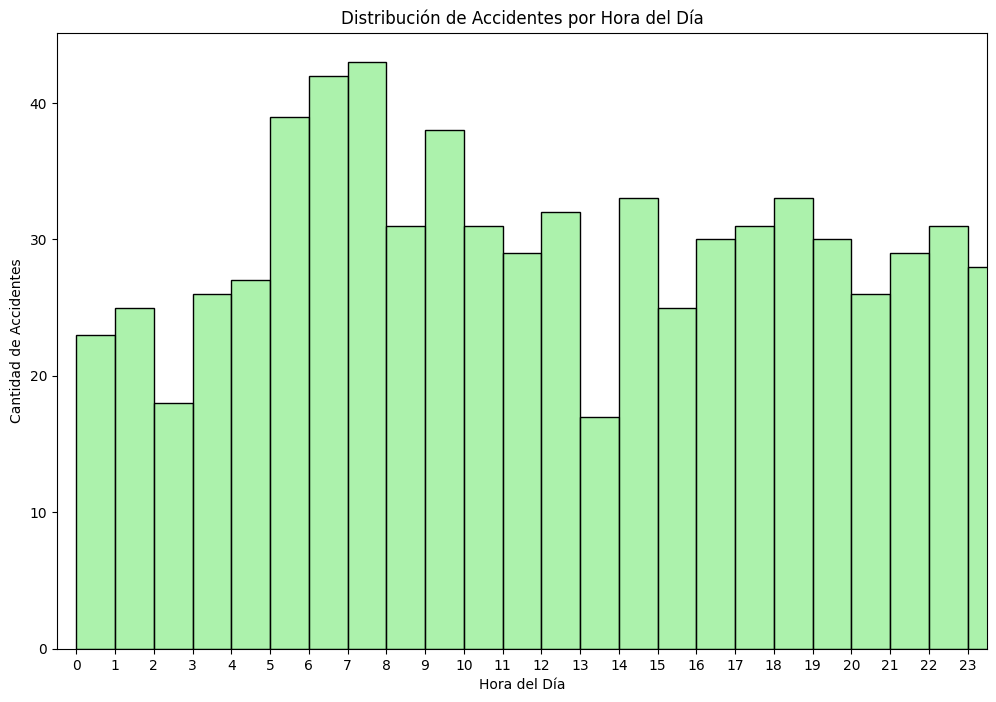

In [36]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df_homicidios, x='HORA SIN MINUTOS', bins=range(0, 25), kde=False, color='lightgreen')
plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(range(24))  
plt.xlim(-0.5, 23.5)
plt.show()

Con mas detalle, se obsera que el rango horario con mayor distribución de los accidentes, es el de 5 am a 7 am. Luego hay otro pico a las 9 am.

Se explora la ubicación de los accidentes y se analiza el impacto del tipo de calle en la seguridad vial:

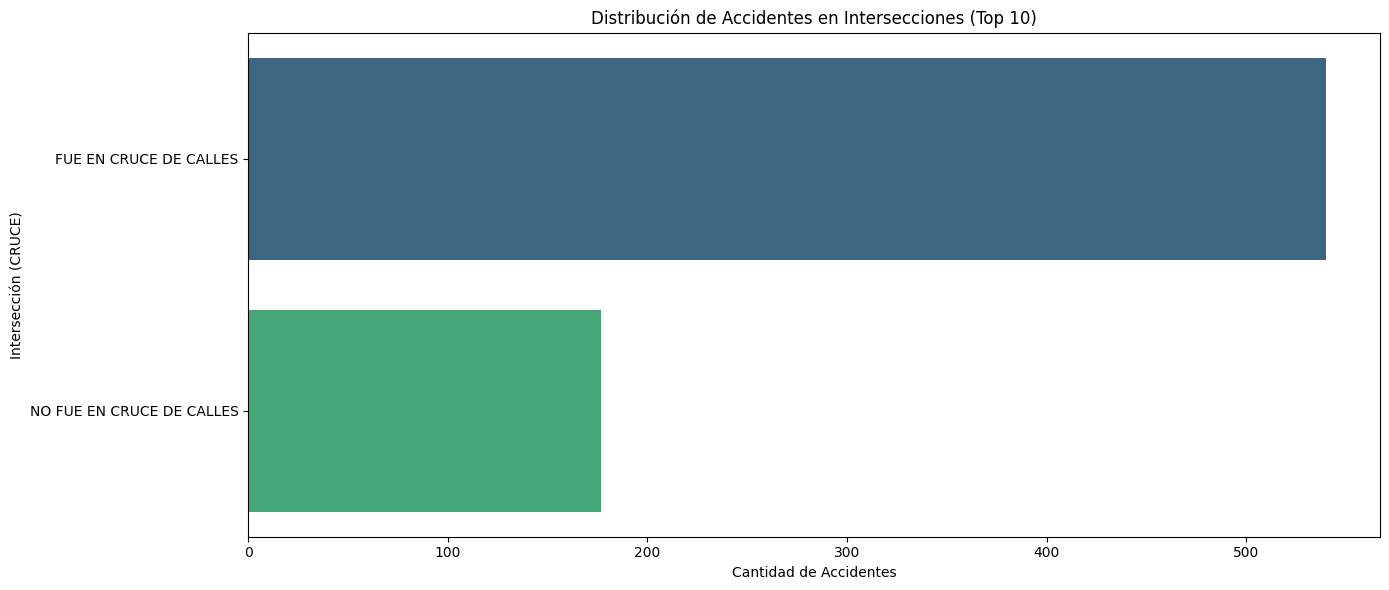

In [50]:
subset_labels = df_homicidios['CRUCE'].value_counts().index[:10]

plt.figure(figsize=(14, 6))
sns.countplot(y='CRUCE', data=df_homicidios[df_homicidios['CRUCE'].isin(subset_labels)], order=subset_labels, palette='viridis')
plt.title('Distribución de Accidentes en Intersecciones (Top 10)')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Intersección (CRUCE)')
plt.tight_layout()
plt.show()

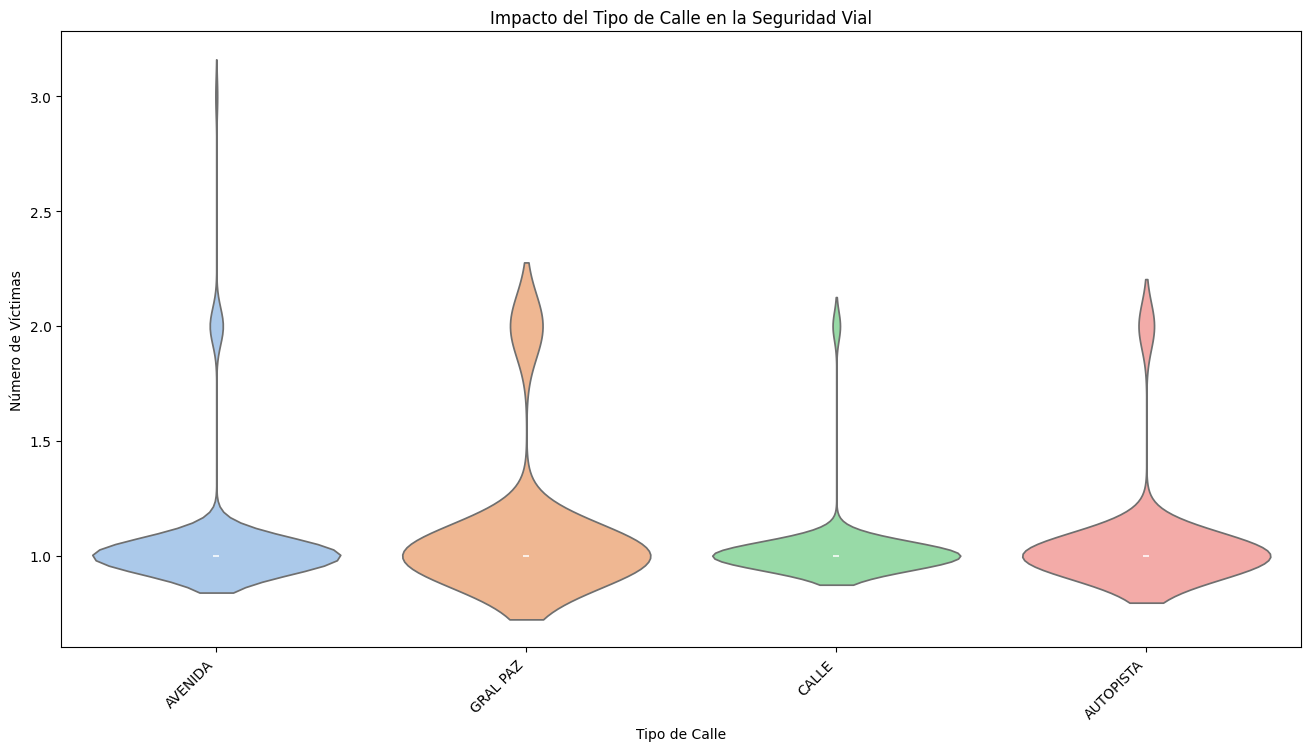

In [44]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='TIPO DE CALLE', y='N VICTIMAS', data=df_homicidios, palette='pastel')
plt.title('Impacto del Tipo de Calle en la Seguridad Vial')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45, ha='right')
plt.show()

Con estos gráficos, podemos observar que los accidentes que se produjeron en intersección de calles triplican los accidentes que se produjeron en otro sitio, como mitad de calle.
Por otro lado, observamos la distribución de víctimas en diferentes tipos de calles, y como en los accidentes que se producen en las Avenidas hay mayor cantidad de víctimas fatales.

Se analiza la relación entre la cantidad de accidentes y la condición de la víctima, y se estudia la proporción de víctimas y acusados:

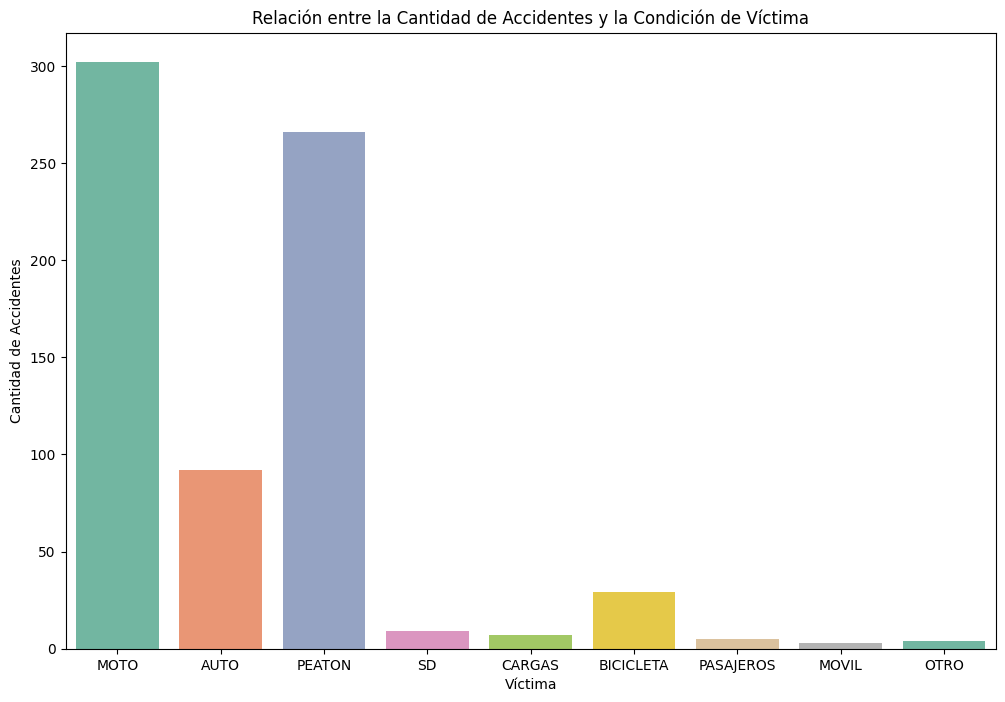

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x='VICTIMA', data=df_homicidios, palette='Set2')
plt.title('Relación entre la Cantidad de Accidentes y la Condición de Víctima')
plt.xlabel('Víctima')
plt.ylabel('Cantidad de Accidentes')
plt.show()

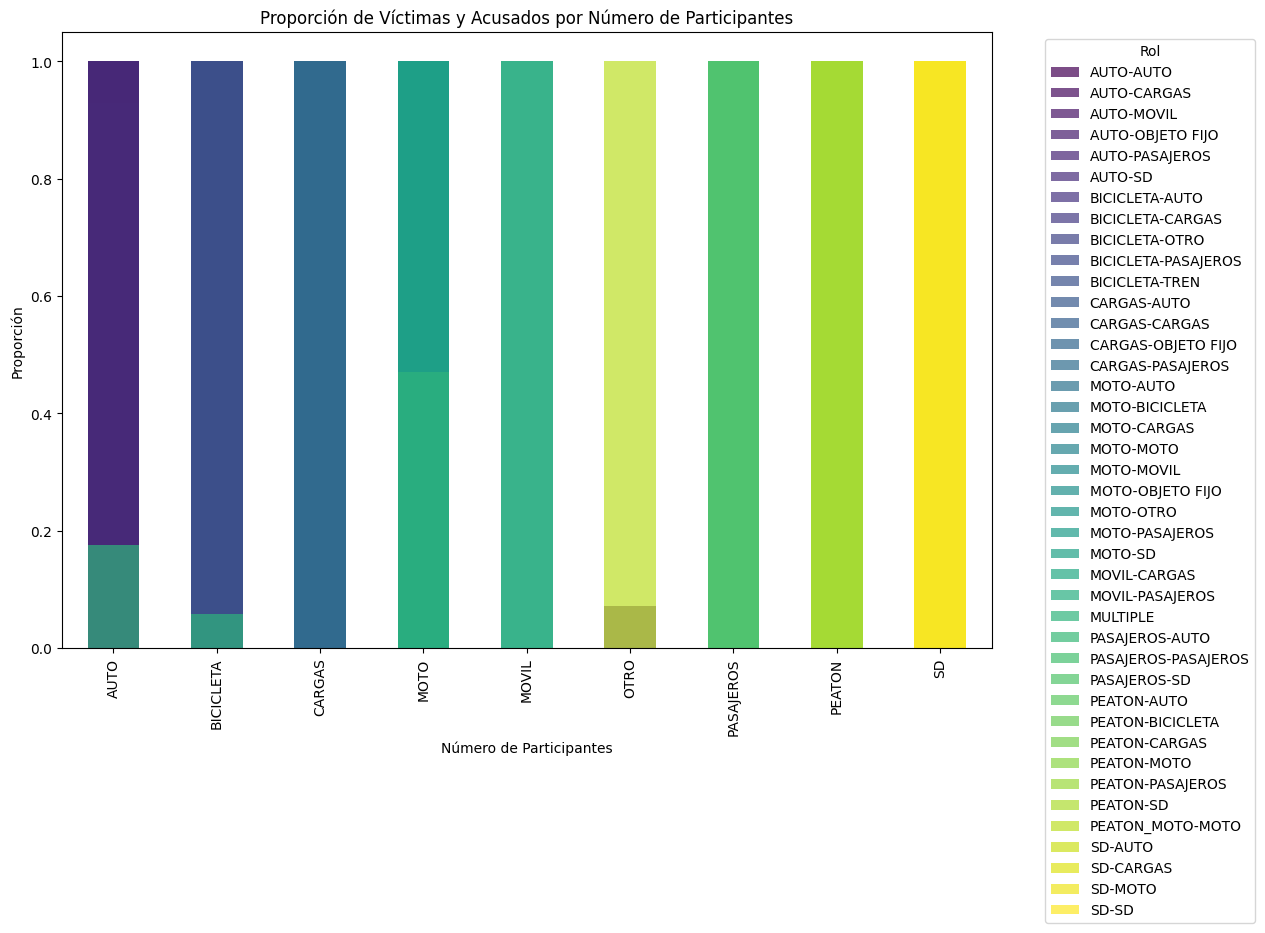

In [66]:
df_homicidios['VICTIMA'].replace({0: 'Acusado', 1: 'Víctima'}, inplace=True)  
proporcion_victimas_acusados = df_homicidios.groupby('PARTICIPANTES')['VICTIMA'].value_counts(normalize=True).unstack()

num_barras = len(proporcion_victimas_acusados)

colores = plt.cm.viridis(np.linspace(0, 1, num_barras))

plt.figure(figsize=(12, 8))
for i, (participantes, proporciones) in enumerate(proporcion_victimas_acusados.iterrows()):
    proporciones.plot(kind='bar', stacked=True, color=[colores[i]], alpha=0.7, label=participantes)

plt.title('Proporción de Víctimas y Acusados por Número de Participantes')
plt.xlabel('Número de Participantes')
plt.ylabel('Proporción')
plt.legend(title='Rol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Con esos gráficos se puede observar que la mayor cantidad de víctimas fueron andando en moto, y en segundo lugar, los peatones.

Se analiza la cantidad de accidentes por Comuna:

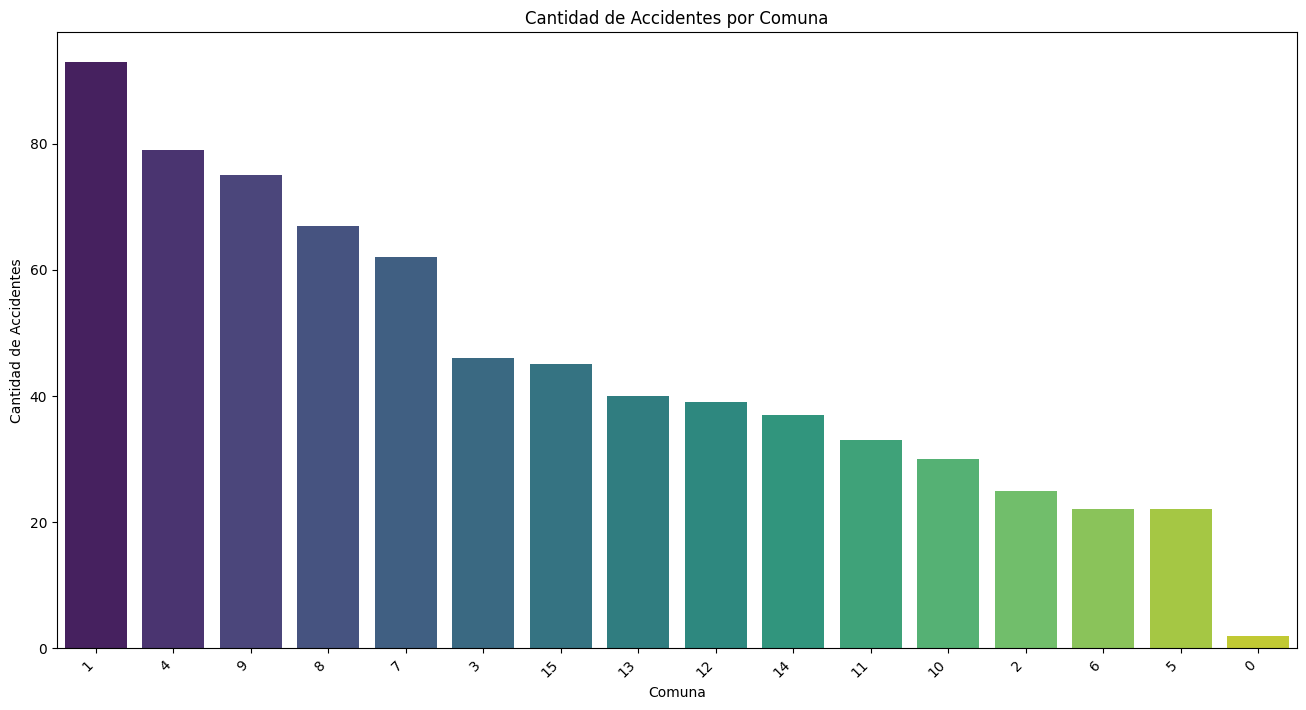

In [67]:
plt.figure(figsize=(16, 8))
sns.countplot(x='COMUNA', data=df_homicidios, order=df_homicidios['COMUNA'].value_counts().index, palette='viridis')
plt.title('Cantidad de Accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45, ha='right')
plt.show()

Se observa que la comuna con mayor cantidad de accidentes de tránsito es la Comuna 1, y la de menor cantidad la Comuna 5.

OJO, ELIMINAR LOS DATOS DE COMUNA 0